

# Introdução

## Clusterização
Através do dataset "countries of the world.csv" que encontra-se nesse mesmo repositório, irei separar os países em grupos similares entre si, através de uma técnica não supervisionada. 
Dividirei os clusters analisando a taxa de mortalidade infantil e renda per capta dos países e irei definir o número ideal de clusters plotando a curva de elbow.


### KMeans no python:

Irei utilizar o K-Means para separar os países em diferentes clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("countries of the world.csv").dropna().reset_index(drop = True)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [6]:
df.shape

(179, 20)

In [7]:
dff = df[['Country', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', ]].copy()
dff.columns = ['pais', 'mortalidade_infantil', 'renda_per_capta']
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,"163,07",700.0
1,Albania,"21,52",4500.0
2,Algeria,31,6000.0
3,Anguilla,"21,03",8600.0
4,Antigua & Barbuda,"19,46",11000.0
...,...,...,...
174,Venezuela,"22,2",4800.0
175,Vietnam,"25,95",2500.0
176,Yemen,"61,5",800.0
177,Zambia,"88,29",800.0


In [8]:
dff.mortalidade_infantil = dff.mortalidade_infantil.apply(lambda s: str(s).replace(",", ".")).astype(float)

In [9]:
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,163.07,700.0
1,Albania,21.52,4500.0
2,Algeria,31.00,6000.0
3,Anguilla,21.03,8600.0
4,Antigua & Barbuda,19.46,11000.0
...,...,...,...
174,Venezuela,22.20,4800.0
175,Vietnam,25.95,2500.0
176,Yemen,61.50,800.0
177,Zambia,88.29,800.0


<br>

Como o __KMeans trabalha com distâncias, irei normalizar os dados__ antes de aplicar o algoritmo
<br>

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
st = StandardScaler()
Xsc = st.fit_transform(dff.values[:, 1:])

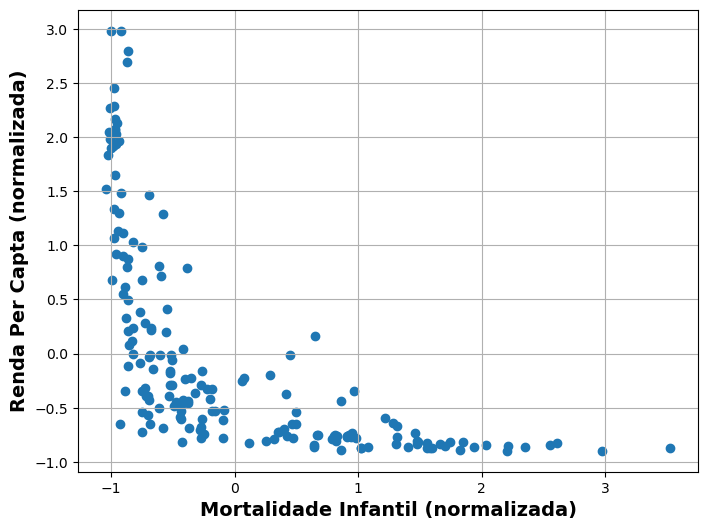

In [12]:
plt.figure(figsize=[8,6])
plt.scatter(Xsc[:,0], Xsc[:, 1])
plt.xlabel("Mortalidade Infantil (normalizada)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Renda Per Capta (normalizada)", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Vemos que o comportamento do gráfico faz sentido: a medida que a taxa de mortalidade infantil aumenta, a renda per capta tende a diminuir.

Podemos também confirmar isso pela alta correlação negativa entre as variáveis:

In [13]:
dff.corr()

C:\Users\rafae\AppData\Local\Temp\ipykernel_10428\788259740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,mortalidade_infantil,renda_per_capta
mortalidade_infantil,1.00000,-0.63909
renda_per_capta,-0.63909,1.00000


<br>

Para decidir a quantidade de clusters ideal, irei utilizar a curva de Elbow para ajudar na decisão
    
<br>

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

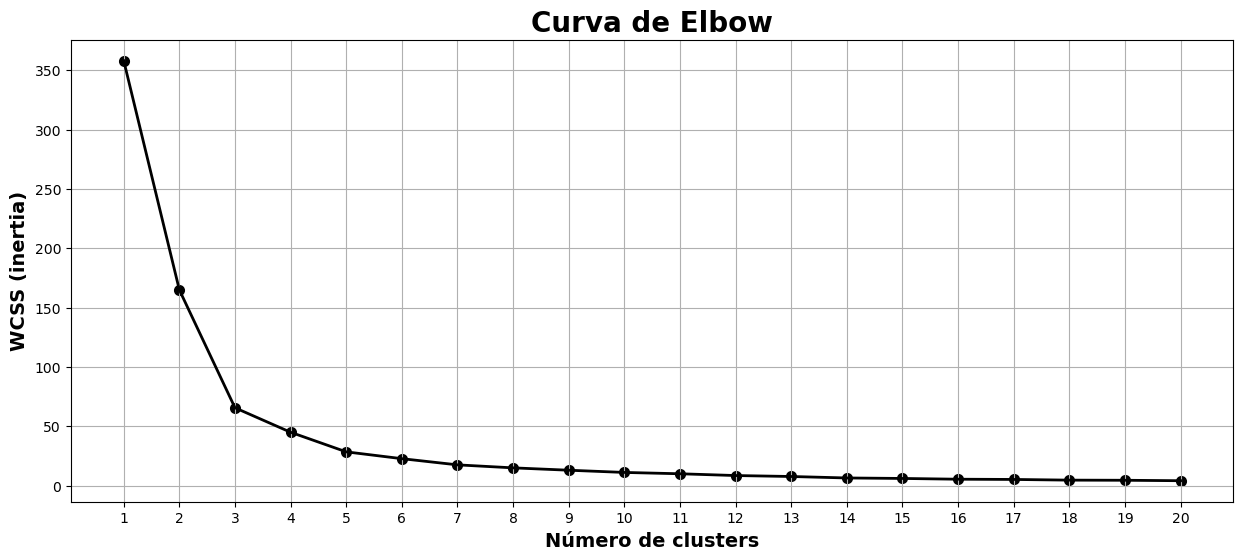

In [14]:
l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(Xsc)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

In [15]:
km = KMeans(n_clusters=3).fit(Xsc)

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
dff['km3'] = km.predict(Xsc)
dff

,pais,mortalidade_infantil,renda_per_capta,km3
0,Afghanistan,163.07,700.0,0
1,Albania,21.52,4500.0,2
2,Algeria,31.00,6000.0,2
3,Anguilla,21.03,8600.0,2
4,Antigua & Barbuda,19.46,11000.0,2
...,...,...,...,...
174,Venezuela,22.20,4800.0,2
175,Vietnam,25.95,2500.0,2
176,Yemen,61.50,800.0,0
177,Zambia,88.29,800.0,0


In [17]:
dff.loc[dff.pais == 'Brazil '].km3.values[0]

2

In [18]:
dff.loc[dff.pais == 'France '].km3.values[0]

1

In [19]:
dff.loc[dff.pais == 'Afghanistan '].km3.values[0]

0

<br><br>

Vemos que o Brasil, França e Afeganistão estão em clusters distintos. Vamos olhar quais são os outros países nesses clusters:

<br>

In [20]:
print("países no mesmo cluster que o Brasil:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'Brazil '].km3.values[0]].pais.values)

países no mesmo cluster que o Brasil:

['Albania ' 'Algeria ' 'Anguilla ' 'Antigua & Barbuda ' 'Argentina '
 'Armenia ' 'Belarus ' 'Belize ' 'Bolivia ' 'Botswana ' 'Brazil '
 'Bulgaria ' 'Cape Verde ' 'Chile ' 'China ' 'Colombia ' 'Costa Rica '
 'Cuba ' 'Dominica ' 'Dominican Republic ' 'Ecuador ' 'Egypt '
 'El Salvador ' 'Estonia ' 'Fiji ' 'French Guiana ' 'Gabon ' 'Georgia '
 'Ghana ' 'Grenada ' 'Guadeloupe ' 'Guatemala ' 'Guyana ' 'Honduras '
 'Hungary ' 'Indonesia ' 'Iran ' 'Iraq ' 'Jamaica ' 'Jordan '
 'Kazakhstan ' 'Korea, North ' 'Kyrgyzstan ' 'Latvia ' 'Malaysia '
 'Marshall Islands ' 'Martinique ' 'Mauritius ' 'Mexico '
 'Micronesia, Fed. St. ' 'Namibia ' 'Netherlands Antilles ' 'Nicaragua '
 'Oman ' 'Palau ' 'Panama ' 'Papua New Guinea ' 'Paraguay ' 'Peru '
 'Philippines ' 'Poland ' 'Reunion ' 'Romania ' 'Saint Kitts & Nevis '
 'Saint Lucia ' 'Saint Vincent and the Grenadines ' 'Samoa '
 'Sao Tome & Principe ' 'Saudi Arabia ' 'Seychelles ' 'Sri Lanka '
 'Suriname ' 'Syria ' '

<br><br>

In [21]:
print("países no mesmo cluster que a França:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'France '].km3.values[0]].pais.values)

países no mesmo cluster que a França:

['Aruba ' 'Australia ' 'Austria ' 'Bahamas, The ' 'Bahrain ' 'Barbados '
 'Belgium ' 'Bermuda ' 'British Virgin Is. ' 'Brunei ' 'Cayman Islands '
 'Czech Republic ' 'Denmark ' 'Finland ' 'France ' 'French Polynesia '
 'Germany ' 'Greece ' 'Hong Kong ' 'Iceland ' 'Ireland ' 'Israel '
 'Japan ' 'Korea, South ' 'Kuwait ' 'Liechtenstein ' 'Macau '
 'Netherlands ' 'New Caledonia ' 'New Zealand ' 'Norway ' 'Portugal '
 'Puerto Rico ' 'Qatar ' 'Singapore ' 'Spain ' 'Sweden ' 'Switzerland '
 'Taiwan ' 'United Arab Emirates ' 'United Kingdom ' 'United States ']


<br><br>

In [22]:
print("países no mesmo cluster que a afeganistão:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'Afghanistan '].km3.values[0]].pais.values)

países no mesmo cluster que a afeganistão:

['Afghanistan ' 'Azerbaijan ' 'Bangladesh ' 'Benin ' 'Bhutan '
 'Burkina Faso ' 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon '
 'Central African Rep. ' 'Chad ' 'Comoros ' 'Congo, Dem. Rep. '
 'Congo, Repub. of the ' "Cote d'Ivoire " 'Djibouti ' 'Equatorial Guinea '
 'Eritrea ' 'Ethiopia ' 'Gambia, The ' 'Guinea ' 'Guinea-Bissau ' 'Haiti '
 'India ' 'Kenya ' 'Laos ' 'Lesotho ' 'Liberia ' 'Madagascar ' 'Malawi '
 'Maldives ' 'Mali ' 'Mauritania ' 'Mongolia ' 'Mozambique ' 'Niger '
 'Nigeria ' 'Pakistan ' 'Rwanda ' 'Senegal ' 'Sierra Leone ' 'Somalia '
 'South Africa ' 'Sudan ' 'Swaziland ' 'Tajikistan ' 'Togo '
 'Turkmenistan ' 'Uganda ' 'Uzbekistan ' 'Vanuatu ' 'Yemen ' 'Zambia '
 'Zimbabwe ']


<br><br>

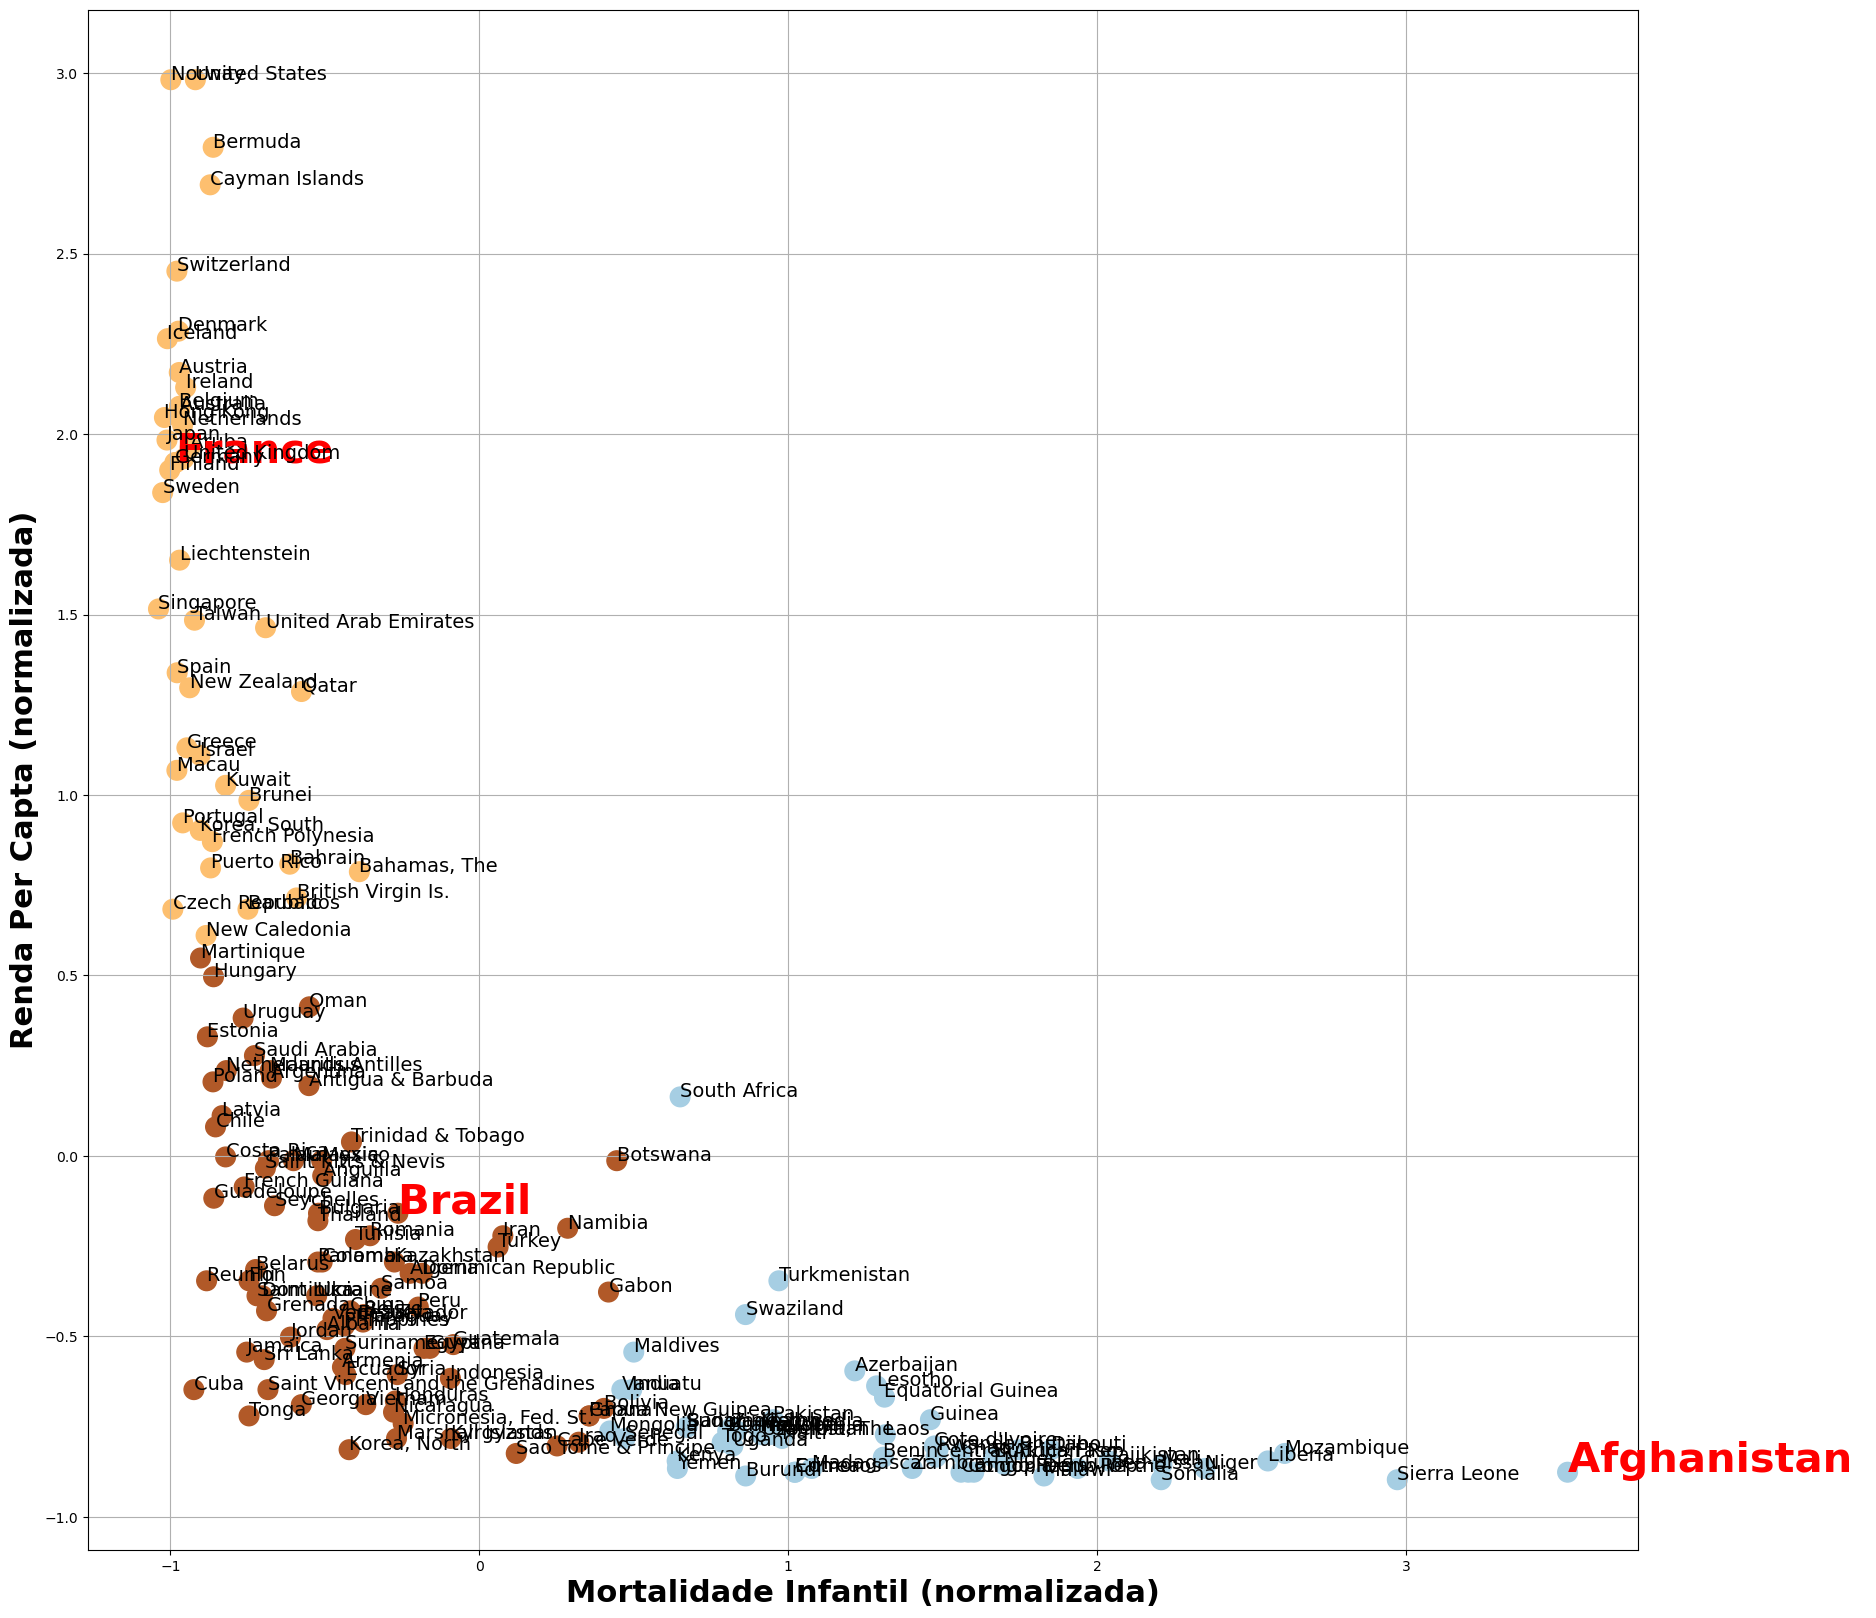

In [23]:
z = Xsc[:,0]
y = Xsc[:,1]

plt.figure(figsize=[20,20])
for i, txt in enumerate(dff.pais.values):
    if txt in ['Brazil ', 'France ', 'Afghanistan ']:
        plt.annotate(txt, (z[i], y[i]), fontsize = 30, fontweight = 'bold', color = 'red')
    else:
        plt.annotate(txt, (z[i], y[i]), fontsize = 14)
    
plt.scatter(Xsc[:,0], Xsc[:, 1], c = dff.km3, s = 200, cmap = plt.cm.Paired)
plt.xlabel("Mortalidade Infantil (normalizada)", fontsize = 22, fontweight = 'bold')
plt.ylabel("Renda Per Capta (normalizada)", fontsize = 22, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Pelo gráfico, vemos que a segmentação criada pelo KMeans com 3 clusters fez bastante sentido e é bem interpretável. Países com bastante similiridade nas variáveis estudadas, encontram-se no mesmo grupo.

<br>